# Simple MNIST Handwritten Digit Recognition

by Luca Göttle 198319 

Used Resources:
- https://www.youtube.com/watch?v=wQ8BIBpya2k
- https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

In [1]:
import tensorflow as tf 
import keras as keras
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist # import mnist dataset

(x_train, y_train), (x_test, y_test) = (mnist.load_data()) # and load dataset

## Normalize data

In [2]:
# normalize mnist dataset to improve performance
x_train_norm = tf.keras.utils.normalize(x_train, axis=1)
x_test_norm = tf.keras.utils.normalize(x_test, axis=1)

## Model builder

easily build a model from a dictionary

In [3]:
def build_model(model_def):
    """
    Arguments:
    model_def: <class 'dict'> ) the model definition
        input_layer: <class tf.keras.layers> the input layer
        hidden_layers: <list <class tf.keras.layers>> hidden layers
        output_layer: <class tf.keras.layers> output layer
        optimizer: (string) the optimizer 
        loss_func: (string) name of the loss function
        metrics: (list <string>) metrics to track while training the model 
    
    Returns:
    model -- keras model
    """
    model = tf.keras.models.Sequential() # sequential model
    model.add(model_def["input_layer"]) # Flatten input layer
    for hidden_layer in model_def["hidden_layers"]:
        model.add(hidden_layer)
    model.add(model_def["output_layer"]) # output layer
    model.compile(
        optimizer= model_def["optimizer"],
        loss= model_def["loss_func"],
        metrics= model_def["metrics"]
    )

    return model
    

## Train and evaluate models

In [13]:
# get the loss, accuracy after every minibatch
# solution taken from https://stackoverflow.com/questions/66394598/how-to-get-history-over-one-epoch-after-every-batch
class BatchCallback(keras.callbacks.Callback):
    batch_accuracy = [] # accuracy at given batch
    batch_loss = [] # loss at given batch    
    def __init__(self):
        super(BatchCallback,self).__init__() 
        self.batch_accuracy = []
        self.batch_loss = []
    def on_train_batch_end(self, batch, logs=None):                
        self.batch_accuracy.append(logs.get('accuracy'))
        self.batch_loss.append(logs.get('loss'))

In [50]:
def run_model(model, train_x, train_y, test_x, test_y, epochs = 1, batch_size = 32, name = None):
    batchCallback = BatchCallback()
    history = model.fit(train_x, train_y, verbose=1, epochs=epochs, batch_size=batch_size, callbacks=[batchCallback], validation_data=(test_x, test_y))
    
    # summarize history for accuracy
    if name != None:
        plt.title(name)
    plt.ylim(0, 1.1)
    plt.ylabel('accuracy')
    plt.xlabel('batch')
    plt.plot(batchCallback.batch_accuracy)
    plt.show()
    plt.clf()

## Standard model

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.6974 - accuracy: 0.8687 - val_loss: 0.7147 - val_accuracy: 0.9183
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.5048 - accuracy: 0.9322 - val_loss: 0.4301 - val_accuracy: 0.9360


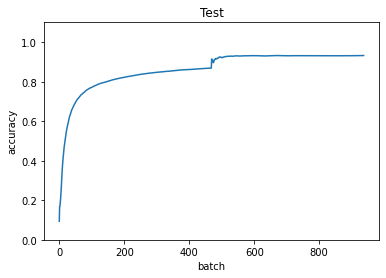

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2425 - accuracy: 0.9332 - val_loss: 0.1266 - val_accuracy: 0.9608


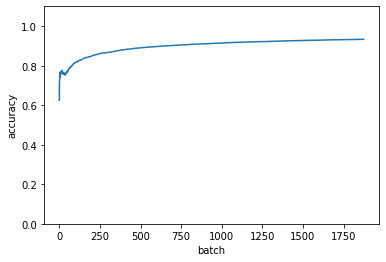

<Figure size 432x288 with 0 Axes>

In [54]:
standard_model = {
    "input_layer": tf.keras.layers.Flatten(),
    "hidden_layers": [
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu)
    ],
    "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    "optimizer": 'adam',
    "loss_func": 'sparse_categorical_crossentropy',
    "metrics": ['accuracy']
}

model_1 = build_model(standard_model)
run_model(model_1, x_train, y_train, x_test, y_test, 2, 128, "Test")

model_2 = build_model(standard_model)
run_model(model_2, x_train_norm, y_train, x_test_norm, y_test)



## Different Models

In [7]:
models = [
    {
        "name": "2 layers, 32 units per layer, relu",
        "input_layer": tf.keras.layers.Flatten(),
        "hidden_layers": [
            tf.keras.layers.Dense(32, activation=tf.nn.relu),
            tf.keras.layers.Dense(32, activation=tf.nn.relu)
        ],
        "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
        "optimizer": 'adam',
        "loss_func": 'sparse_categorical_crossentropy',
        "metrics": ['accuracy'] 
    },
    {
        "name": "three layer, decreasing units",
        "input_layer": tf.keras.layers.Flatten(),
        "hidden_layers": [
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(32, activation=tf.nn.relu),
            tf.keras.layers.Dense(16, activation=tf.nn.relu)
        ],
        "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
        "optimizer": 'adam',
        "loss_func": 'sparse_categorical_crossentropy',
        "metrics": ['accuracy'] 
    },
    {
        "name": "three layer, decreasing units",
        "input_layer": tf.keras.layers.Flatten(),
        "hidden_layers": [
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(64, activation=tf.nn.relu)
        ],
        "output_layer": tf.keras.layers.Dense(10, activation=tf.nn.softmax),
        "optimizer": 'adam',
        "loss_func": 'sparse_categorical_crossentropy',
        "metrics": ['accuracy'] 
    }
]

1875/1875 [==============================] - 3s 1ms/step - loss: 26.5624 - accuracy: 0.9347


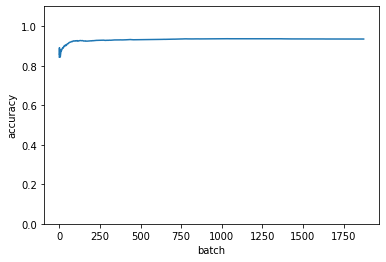

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2241 - accuracy: 0.9347


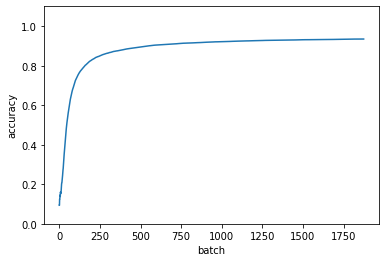

1875/1875 [==============================] - 3s 2ms/step - loss: 13.1441 - accuracy: 0.9697


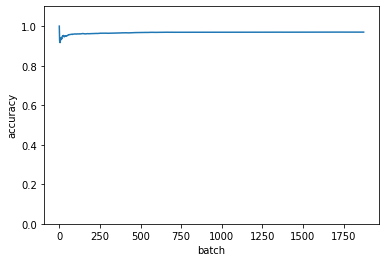

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9690


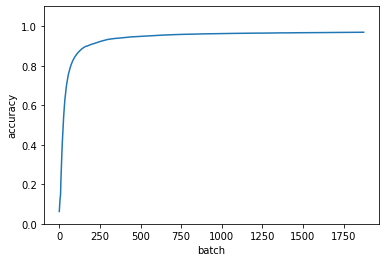

1875/1875 [==============================] - 6s 3ms/step - loss: 3.5920 - accuracy: 0.9861


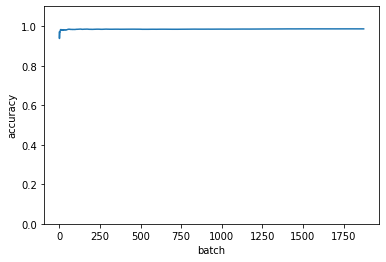

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0560 - accuracy: 0.9834


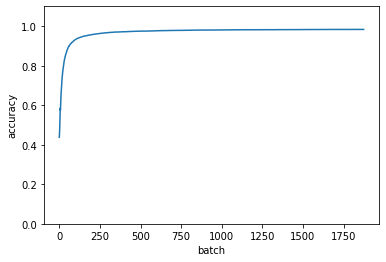

<Figure size 432x288 with 0 Axes>

In [42]:
for model_def in models:
    mod_1 = build_model(model_def)
    mod_2 = build_model(model_def)
    run_model(mod_1, x_train, y_train, x_test, y_test)
    run_model(mod_2, x_train_norm, y_train, x_test_norm, y_test)
    